In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import fix_yahoo_finance as yf

%matplotlib inline

import sqlite3
import time, datetime, random
import matplotlib
#matplotlib.use("Agg")
#added due to error, possibly due to install configuration


print(matplotlib.get_backend())
import matplotlib.dates as mdates
from matplotlib import style
style.use('fivethirtyeight')


module://ipykernel.pylab.backend_inline


In [4]:
DATASTORE = "data/stock_data.db"
START_DATE = '2016-06-17'
END_DATE   = '2018-06-17'

In [5]:
#df = pd.read_csv('20180601-asx-listed-companies.csv', header=1)
#code_col_name = 'Code'
df = pd.read_csv('ASXListedCompanies.csv', header=1)
code_col_name = 'ASX code'

In [6]:
print (df.shape)
print (list(df))
print(df.head())

(2255, 3)
['Company name', 'ASX code', 'GICS industry group']
           Company name ASX code               GICS industry group
0           MOQ LIMITED      MOQ               Software & Services
1        1-PAGE LIMITED      1PG               Software & Services
2   1300 SMILES LIMITED      ONT  Health Care Equipment & Services
3  1414 DEGREES LIMITED      14D                        Class Pend
4     1ST GROUP LIMITED      1ST  Health Care Equipment & Services


In [7]:
#df['Code'][0]
df[code_col_name][0]

'MOQ'

In [8]:
for code in df[code_col_name]:
    print (code)
    break

MOQ


start downloading data for :  ASX.MOQ
[*********************100%***********************]  1 of 1 downloaded
end downloading data
<class 'pandas.core.frame.DataFrame'> (505, 6)


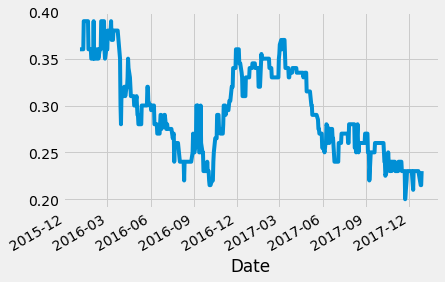

end
column Names : ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
            Open  High   Low  Close  Adj Close  Volume
Date                                                  
2016-01-03  0.36  0.36  0.36   0.36       0.36   12500
2016-01-04  0.39  0.39  0.36   0.36       0.36   26347
2016-01-05  0.36  0.36  0.36   0.36       0.36       0
2016-01-06  0.36  0.36  0.36   0.36       0.36       0
2016-01-07  0.36  0.36  0.36   0.36       0.36       0


In [24]:
print ("start downloading data for : ", "ASX."+df[code_col_name][0])
data = yf.download(df[code_col_name][0]+".AX",'2016-01-01','2018-01-01')
#data = yf.download("BHP.AX",'2016-01-01','2018-01-01')
print ("end downloading data")
print (type(data), data.shape)
if data.shape[0]>0:
    data.Close.plot()
    plt.show()
print ("end")
print ("column Names :", list(data))
print (data.head())

In [10]:
#cols available = ['Code', 'Company', 'Sector', 'Market Cap', 'Weight(%)', 'Unnamed: 5', 'Total Index Market Cap']
#cols to store in db : ['Code', 'Company', 'Sector']
#['Company name', 'ASX code', 'GICS industry group']

In [11]:
conn = sqlite3.connect(DATASTORE)
c = conn.cursor()


In [12]:
def create_table():
    c.execute('CREATE TABLE IF NOT EXISTS stocks(stockcode TEXT PRIMARY KEY, company TEXT, sector TEXT)')
    create2 = (
        'CREATE TABLE IF NOT EXISTS trading_data('
                    'stockcode TEXT, '
                    'date TEXT, '
                    'open REAL, '
                    'high REAL, '
                    'low REAL, '
                    'close REAL, '
                    'adjcloe REAL, '
                    'volume INTEGER, '
                    'PRIMARY KEY (stockcode , date) )'
            )
    print ("create2:", create2)
    c.execute(create2)

In [13]:
def read_from_db():
    c.execute("SELECT * FROM stocks")
    data = c.fetchall()
    print (type(data), "# of rows:", len(data))
    #print(data)
    for row in data:
        print (row)

In [25]:
def get_stock_history():
    #get list of stocks from db.  2268 stocks.
    #get trading history from yahoo  - daily trade values, 1 yr = 365 rows.
    #store trading history in database.
    count = 0
    c.execute("SELECT * FROM stocks")
    data = c.fetchall()
    print (type(data), "# of rows:", len(data))
    #print(data)
    for row in data:
        print (row)
        print ("CODE:", row[0], type(row[0]))
        print ("start")
        data = yf.download(row[0]+".AX", START_DATE, END_DATE)
        print ("end downloading data")
        print (type(data), data.shape)
        if data.shape[0]>0:
            print(data.head())
        if count > 100: break
        count += 1

        

In [15]:
def get_history():
    c.execute("SELECT * FROM trading_data")
    data = c.fetchall()
    print (type(data), "# of rows:", len(data))
    #print(data)
    for row in data:
        print (row)

In [16]:
create_table()
read_from_db()

create2: CREATE TABLE IF NOT EXISTS trading_data(stockcode TEXT, date TEXT, open REAL, high REAL, low REAL, close REAL, adjcloe REAL, volume INTEGER, PRIMARY KEY (stockcode , date) )
<class 'list'> # of rows: 0


In [17]:
for index, row in df.iterrows():
    print (index, row)
    print (index, row['ASX code'], row['Company name'], row['GICS industry group'] )
    c.execute("INSERT into stocks (stockcode, company, sector) VALUES (?, ?, ?)", (row['ASX code'], row['Company name'], row['GICS industry group']))
    conn.commit()
    #break
    

0 Company name                   MOQ LIMITED
ASX code                               MOQ
GICS industry group    Software & Services
Name: 0, dtype: object
0 MOQ MOQ LIMITED Software & Services
1 Company name                1-PAGE LIMITED
ASX code                               1PG
GICS industry group    Software & Services
Name: 1, dtype: object
1 1PG 1-PAGE LIMITED Software & Services
2 Company name                        1300 SMILES LIMITED
ASX code                                            ONT
GICS industry group    Health Care Equipment & Services
Name: 2, dtype: object
2 ONT 1300 SMILES LIMITED Health Care Equipment & Services
3 Company name           1414 DEGREES LIMITED
ASX code                                14D
GICS industry group              Class Pend
Name: 3, dtype: object
3 14D 1414 DEGREES LIMITED Class Pend
4 Company name                          1ST GROUP LIMITED
ASX code                                            1ST
GICS industry group    Health Care Equipment & Servi

42 Company name           ADELAIDE BRIGHTON LIMITED
ASX code                                     ABC
GICS industry group                    Materials
Name: 42, dtype: object
42 ABC ADELAIDE BRIGHTON LIMITED Materials
43 Company name                           ADHERIUM LIMITED
ASX code                                            ADR
GICS industry group    Health Care Equipment & Services
Name: 43, dtype: object
43 ADR ADHERIUM LIMITED Health Care Equipment & Services
44 Company name                                ADMEDUS LTD
ASX code                                            AHZ
GICS industry group    Health Care Equipment & Services
Name: 44, dtype: object
44 AHZ ADMEDUS LTD Health Care Equipment & Services
45 Company name           ADMIRALTY RESOURCES NL.
ASX code                                   ADY
GICS industry group                  Materials
Name: 45, dtype: object
45 ADY ADMIRALTY RESOURCES NL. Materials
46 Company name           ADRIATIC METALS PLC
ASX code                     

82 Company name           ALKANE RESOURCES LIMITED
ASX code                                    ALK
GICS industry group                   Materials
Name: 82, dtype: object
82 ALK ALKANE RESOURCES LIMITED Materials
83 Company name           ALLEGIANCE COAL LIMITED
ASX code                                   AHQ
GICS industry group                  Materials
Name: 83, dtype: object
83 AHQ ALLEGIANCE COAL LIMITED Materials
84 Company name               ALLEGRA ORTHOPAEDICS LIMITED
ASX code                                            AMT
GICS industry group    Health Care Equipment & Services
Name: 84, dtype: object
84 AMT ALLEGRA ORTHOPAEDICS LIMITED Health Care Equipment & Services
85 Company name           ALLIANCE AVIATION SERVICES LIMITED
ASX code                                              AQZ
GICS industry group                        Transportation
Name: 85, dtype: object
85 AQZ ALLIANCE AVIATION SERVICES LIMITED Transportation
86 Company name           ALLIANCE RESOURCES LIMITED
ASX

Name: 123, dtype: object
123 ATT ANTE REAL ESTATE TRUST Real Estate
124 Company name                                ANTEO DIAGNOSTICS LIMITED
ASX code                                                          ADO
GICS industry group    Pharmaceuticals, Biotechnology & Life Sciences
Name: 124, dtype: object
124 ADO ANTEO DIAGNOSTICS LIMITED Pharmaceuticals, Biotechnology & Life Sciences
125 Company name           ANTILLES OIL AND GAS NL
ASX code                                   AVD
GICS industry group                     Energy
Name: 125, dtype: object
125 AVD ANTILLES OIL AND GAS NL Energy
126 Company name           ANTIPA MINERALS LIMITED
ASX code                                   AZY
GICS industry group                  Materials
Name: 126, dtype: object
126 AZY ANTIPA MINERALS LIMITED Materials
127 Company name           ANTIPODES GLOBAL INVESTMENT COMPANY LTD
ASX code                                                   APL
GICS industry group                                 Not Appli

166 Company name             ARQ GROUP LIMITED
ASX code                               ARQ
GICS industry group    Software & Services
Name: 166, dtype: object
166 ARQ ARQ GROUP LIMITED Software & Services
167 Company name           ARROW MINERALS LTD
ASX code                              AMD
GICS industry group             Materials
Name: 167, dtype: object
167 AMD ARROW MINERALS LTD Materials
168 Company name           ARTEMIS RESOURCES LIMITED
ASX code                                     ARV
GICS industry group                    Materials
Name: 168, dtype: object
168 ARV ARTEMIS RESOURCES LIMITED Materials
169 Company name           ARUMA RESOURCES LIMITED
ASX code                                   AAJ
GICS industry group                  Materials
Name: 169, dtype: object
169 AAJ ARUMA RESOURCES LIMITED Materials
170 Company name                     ASALEO CARE LIMITED
ASX code                                         AHY
GICS industry group    Household & Personal Products
Name: 170

204 Company name           AURELIA METALS LIMITED
ASX code                                  AMI
GICS industry group                 Materials
Name: 204, dtype: object
204 AMI AURELIA METALS LIMITED Materials
205 Company name           AURIS MINERALS LIMITED
ASX code                                  AUR
GICS industry group                 Materials
Name: 205, dtype: object
205 AUR AURIS MINERALS LIMITED Materials
206 Company name           AURIZON HOLDINGS LIMITED
ASX code                                    AZJ
GICS industry group              Transportation
Name: 206, dtype: object
206 AZJ AURIZON HOLDINGS LIMITED Transportation
207 Company name           AUROCH MINERALS LTD
ASX code                               AOU
GICS industry group              Materials
Name: 207, dtype: object
207 AOU AUROCH MINERALS LTD Materials
208 Company name           AURORA ABSOLUTE RETURN FUND
ASX code                                       ABW
GICS industry group                     Not Applic
Name: 208,

242 Company name           AUSTRALIAN FOUNDATION INVESTMENT COMPANY LIMITED
ASX code                                                            AFI
GICS industry group                                          Not Applic
Name: 242, dtype: object
242 AFI AUSTRALIAN FOUNDATION INVESTMENT COMPANY LIMITED Not Applic
243 Company name           AUSTRALIAN GOVERNANCE MASTERS INDEX FUND LIMITED
ASX code                                                            AQF
GICS industry group                              Diversified Financials
Name: 243, dtype: object
243 AQF AUSTRALIAN GOVERNANCE MASTERS INDEX FUND LIMITED Diversified Financials
244 Company name           AUSTRALIAN LEADERS FUND LIMITED
ASX code                                           ALF
GICS industry group             Diversified Financials
Name: 244, dtype: object
244 ALF AUSTRALIAN LEADERS FUND LIMITED Diversified Financials
245 Company name           AUSTRALIAN MASTERS YIELD FUND NO 4 LIMITED
ASX code                           

280 Company name           AZURE MINERALS LIMITED
ASX code                                  AZS
GICS industry group                 Materials
Name: 280, dtype: object
280 AZS AZURE MINERALS LIMITED Materials
281 Company name           BABY BUNTING GROUP LIMITED
ASX code                                      BBN
GICS industry group                     Retailing
Name: 281, dtype: object
281 BBN BABY BUNTING GROUP LIMITED Retailing
282 Company name           BABYLON PUMP & POWER LIMITED
ASX code                                        BPP
GICS industry group                   Capital Goods
Name: 282, dtype: object
282 BPP BABYLON PUMP & POWER LIMITED Capital Goods
283 Company name           BAILADOR TECHNOLOGY INVESTMENTS LIMITED
ASX code                                                   BTI
GICS industry group                     Diversified Financials
Name: 283, dtype: object
283 BTI BAILADOR TECHNOLOGY INVESTMENTS LIMITED Diversified Financials
284 Company name           BANK OF QUEENSLA

317 Company name             BIDENERGY LIMITED
ASX code                               BID
GICS industry group    Software & Services
Name: 317, dtype: object
317 BID BIDENERGY LIMITED Software & Services
318 Company name           BIG RIVER INDUSTRIES LIMITED
ASX code                                        BRI
GICS industry group                       Materials
Name: 318, dtype: object
318 BRI BIG RIVER INDUSTRIES LIMITED Materials
319 Company name           BIG STAR ENERGY LIMITED
ASX code                                   BNL
GICS industry group                     Energy
Name: 319, dtype: object
319 BNL BIG STAR ENERGY LIMITED Energy
320 Company name                BIG UN LIMITED
ASX code                               BIG
GICS industry group    Software & Services
Name: 320, dtype: object
320 BIG BIG UN LIMITED Software & Services
321 Company name           BIGTINCAN HOLDINGS LIMITED
ASX code                                      BTH
GICS industry group           Software & Services


Name: 354, dtype: object
354 BOA BOADICEA RESOURCES LIMITED Materials
355 Company name           BOART LONGYEAR LIMITED
ASX code                                  BLY
GICS industry group             Capital Goods
Name: 355, dtype: object
355 BLY BOART LONGYEAR LIMITED Capital Goods
356 Company name           BOD AUSTRALIA LIMITED
ASX code                                 BDA
GICS industry group                Retailing
Name: 356, dtype: object
356 BDA BOD AUSTRALIA LIMITED Retailing
357 Company name           BOJUN AGRICULTURE HOLDINGS LIMITED
ASX code                                              BAH
GICS industry group              Food, Beverage & Tobacco
Name: 357, dtype: object
357 BAH BOJUN AGRICULTURE HOLDINGS LIMITED Food, Beverage & Tobacco
358 Company name           BOOM LOGISTICS LIMITED
ASX code                                  BOL
GICS industry group             Capital Goods
Name: 358, dtype: object
358 BOL BOOM LOGISTICS LIMITED Capital Goods
359 Company name           BORA

396 Company name             BWP TRUST
ASX code                       BWP
GICS industry group    Real Estate
Name: 396, dtype: object
396 BWP BWP TRUST Real Estate
397 Company name                             BWX LIMITED
ASX code                                         BWX
GICS industry group    Household & Personal Products
Name: 397, dtype: object
397 BWX BWX LIMITED Household & Personal Products
398 Company name           BYRON ENERGY LIMITED
ASX code                                BYE
GICS industry group                  Energy
Name: 398, dtype: object
398 BYE BYRON ENERGY LIMITED Energy
399 Company name           BYTE POWER GROUP LIMITED
ASX code                                    BPG
GICS industry group                   Retailing
Name: 399, dtype: object
399 BPG BYTE POWER GROUP LIMITED Retailing
400 Company name                  CABCHARGE AUSTRALIA LIMITED
ASX code                                              CAB
GICS industry group    Commercial & Professional Services
Name: 4

438 Company name           CASTILLO COPPER LIMITED
ASX code                                   CCZ
GICS industry group                  Materials
Name: 438, dtype: object
438 CCZ CASTILLO COPPER LIMITED Materials
439 Company name           CASTLE MINERALS LIMITED
ASX code                                   CDT
GICS industry group                  Materials
Name: 439, dtype: object
439 CDT CASTLE MINERALS LIMITED Materials
440 Company name           CATALYST METALS LIMITED
ASX code                                   CYL
GICS industry group                  Materials
Name: 440, dtype: object
440 CYL CATALYST METALS LIMITED Materials
441 Company name           CATAPULT GROUP INTERNATIONAL LTD
ASX code                                            CAT
GICS industry group     Technology Hardware & Equipment
Name: 441, dtype: object
441 CAT CATAPULT GROUP INTERNATIONAL LTD Technology Hardware & Equipment
442 Company name           CAULDRON ENERGY LIMITED
ASX code                                   

475 Company name           CHARTER HALL RETAIL REIT
ASX code                                    CQR
GICS industry group                 Real Estate
Name: 475, dtype: object
475 CQR CHARTER HALL RETAIL REIT Real Estate
476 Company name           CHESSER RESOURCES LIMITED
ASX code                                     CHZ
GICS industry group                    Materials
Name: 476, dtype: object
476 CHZ CHESSER RESOURCES LIMITED Materials
477 Company name           CHINA CONSTRUCTION BANK CORPORATION
ASX code                                               CCB
GICS industry group                             Not Applic
Name: 477, dtype: object
477 CCB CHINA CONSTRUCTION BANK CORPORATION Not Applic
478 Company name           CHINA DAIRY CORPORATION LIMITED
ASX code                                           CDC
GICS industry group           Food, Beverage & Tobacco
Name: 478, dtype: object
478 CDC CHINA DAIRY CORPORATION LIMITED Food, Beverage & Tobacco
479 Company name           CHINA MAGNESIUM

511 Company name           COHIBA MINERALS LIMITED
ASX code                                   CHK
GICS industry group                  Materials
Name: 511, dtype: object
511 CHK COHIBA MINERALS LIMITED Materials
512 Company name           COKAL LIMITED
ASX code                         CKA
GICS industry group        Materials
Name: 512, dtype: object
512 CKA COKAL LIMITED Materials
513 Company name           COLLABORATE CORPORATION LIMITED
ASX code                                           CL8
GICS industry group                Software & Services
Name: 513, dtype: object
513 CL8 COLLABORATE CORPORATION LIMITED Software & Services
514 Company name                     COLLECTION HOUSE LIMITED
ASX code                                              CLH
GICS industry group    Commercial & Professional Services
Name: 514, dtype: object
514 CLH COLLECTION HOUSE LIMITED Commercial & Professional Services
515 Company name           COLLERINA COBALT LIMITED
ASX code                               

547 Company name           CORDISH DIXON PRIVATE EQUITY FUND III
ASX code                                                 CD3
GICS industry group                               Not Applic
Name: 547, dtype: object
547 CD3 CORDISH DIXON PRIVATE EQUITY FUND III Not Applic
548 Company name           CORE EXPLORATION LIMITED
ASX code                                    CXO
GICS industry group                   Materials
Name: 548, dtype: object
548 CXO CORE EXPLORATION LIMITED Materials
549 Company name           CORIZON LIMITED
ASX code                           CIZ
GICS industry group         Not Applic
Name: 549, dtype: object
549 CIZ CORIZON LIMITED Not Applic
550 Company name           CORONA RESOURCES LIMITED
ASX code                                    CNA
GICS industry group                  Class Pend
Name: 550, dtype: object
550 CNA CORONA RESOURCES LIMITED Class Pend
551 Company name           CORPORATE TRAVEL MANAGEMENT LIMITED
ASX code                                              

583 Company name           CUE ENERGY RESOURCES LIMITED
ASX code                                        CUE
GICS industry group                          Energy
Name: 583, dtype: object
583 CUE CUE ENERGY RESOURCES LIMITED Energy
584 Company name           CULLEN RESOURCES LIMITED
ASX code                                    CUL
GICS industry group                   Materials
Name: 584, dtype: object
584 CUL CULLEN RESOURCES LIMITED Materials
585 Company name                  CV CHECK LTD
ASX code                               CV1
GICS industry group    Software & Services
Name: 585, dtype: object
585 CV1 CV CHECK LTD Software & Services
586 Company name                      CVC LIMITED
ASX code                                  CVC
GICS industry group    Diversified Financials
Name: 586, dtype: object
586 CVC CVC LIMITED Diversified Financials
587 Company name           CYBG PLC
ASX code                    CYB
GICS industry group       Banks
Name: 587, dtype: object
587 CYB CYBG PLC Bank

Name: 623, dtype: object
623 DUI DIVERSIFIED UNITED INVESTMENT LIMITED Diversified Financials
624 Company name           DJERRIWARRH INVESTMENTS LIMITED
ASX code                                           DJW
GICS industry group             Diversified Financials
Name: 624, dtype: object
624 DJW DJERRIWARRH INVESTMENTS LIMITED Diversified Financials
625 Company name                  DOMACOM LIMITED
ASX code                                  DCL
GICS industry group    Diversified Financials
Name: 625, dtype: object
625 DCL DOMACOM LIMITED Diversified Financials
626 Company name           DOMAIN HOLDINGS AUSTRALIA LIMITED.
ASX code                                              DHG
GICS industry group                   Software & Services
Name: 626, dtype: object
626 DHG DOMAIN HOLDINGS AUSTRALIA LIMITED. Software & Services
627 Company name           DOME GOLD MINES LIMITED
ASX code                                   DME
GICS industry group                  Materials
Name: 627, dtype: object

663 Company name           EASTON INVESTMENTS LIMITED
ASX code                                      EAS
GICS industry group        Diversified Financials
Name: 663, dtype: object
663 EAS EASTON INVESTMENTS LIMITED Diversified Financials
664 Company name                         EBOS GROUP LIMITED
ASX code                                            EBO
GICS industry group    Health Care Equipment & Services
Name: 664, dtype: object
664 EBO EBOS GROUP LIMITED Health Care Equipment & Services
665 Company name                      ECARGO HOLDINGS LIMITED
ASX code                                              ECG
GICS industry group    Commercial & Professional Services
Name: 665, dtype: object
665 ECG ECARGO HOLDINGS LIMITED Commercial & Professional Services
666 Company name           ECHO RESOURCES LIMITED
ASX code                                  EAR
GICS industry group                 Materials
Name: 666, dtype: object
666 EAR ECHO RESOURCES LIMITED Materials
667 Company name           E

703 Company name           ENCOUNTER RESOURCES LIMITED
ASX code                                       ENR
GICS industry group                      Materials
Name: 703, dtype: object
703 ENR ENCOUNTER RESOURCES LIMITED Materials
704 Company name           ENEABBA GAS LIMITED
ASX code                               ENB
GICS industry group              Utilities
Name: 704, dtype: object
704 ENB ENEABBA GAS LIMITED Utilities
705 Company name           ENEGEX LIMITED
ASX code                          ENX
GICS industry group            Energy
Name: 705, dtype: object
705 ENX ENEGEX LIMITED Energy
706 Company name                        ENERGY ACTION LIMITED
ASX code                                              EAX
GICS industry group    Commercial & Professional Services
Name: 706, dtype: object
706 EAX ENERGY ACTION LIMITED Commercial & Professional Services
707 Company name           ENERGY METALS LTD
ASX code                             EME
GICS industry group               Energy
Name: 70

744 Company name                    EUROZ LIMITED
ASX code                                  EZL
GICS industry group    Diversified Financials
Name: 744, dtype: object
744 EZL EUROZ LIMITED Diversified Financials
745 Company name           EVANS & PARTNERS ASIA FUND
ASX code                                      EAF
GICS industry group                    Not Applic
Name: 745, dtype: object
745 EAF EVANS & PARTNERS ASIA FUND Not Applic
746 Company name           EVANS & PARTNERS AUSTRALIAN FLAGSHIP FUND
ASX code                                                     EFF
GICS industry group                                   Class Pend
Name: 746, dtype: object
746 EFF EVANS & PARTNERS AUSTRALIAN FLAGSHIP FUND Class Pend
747 Company name           EVANS & PARTNERS GLOBAL DISRUPTION FUND
ASX code                                                   EGD
GICS industry group                                 Not Applic
Name: 747, dtype: object
747 EGD EVANS & PARTNERS GLOBAL DISRUPTION FUND Not Applic
7

Name: 783, dtype: object
783 FCT FIRSTWAVE CLOUD TECHNOLOGY LIMITED Software & Services
784 Company name           FISHER & PAYKEL HEALTHCARE CORPORATION LIMITED
ASX code                                                          FPH
GICS industry group                  Health Care Equipment & Services
Name: 784, dtype: object
784 FPH FISHER & PAYKEL HEALTHCARE CORPORATION LIMITED Health Care Equipment & Services
785 Company name           FITZROY RIVER CORPORATION LTD
ASX code                                         FZR
GICS industry group                           Energy
Name: 785, dtype: object
785 FZR FITZROY RIVER CORPORATION LTD Energy
786 Company name           FLAGSHIP INVESTMENTS LIMITED
ASX code                                        FSI
GICS industry group          Diversified Financials
Name: 786, dtype: object
786 FSI FLAGSHIP INVESTMENTS LIMITED Diversified Financials
787 Company name           FLAMINGO AI LIMITED
ASX code                               FGO
GICS industry gro

Name: 818, dtype: object
818 FGX FUTURE GENERATION INVESTMENT COMPANY LIMITED Not Applic
819 Company name           FYI RESOURCES LIMITED
ASX code                                 FYI
GICS industry group                Materials
Name: 819, dtype: object
819 FYI FYI RESOURCES LIMITED Materials
820 Company name           G MEDICAL INNOVATIONS HOLDINGS LIMITED
ASX code                                                  GMV
GICS industry group          Health Care Equipment & Services
Name: 820, dtype: object
820 GMV G MEDICAL INNOVATIONS HOLDINGS LIMITED Health Care Equipment & Services
821 Company name            G.U.D. HOLDINGS LIMITED
ASX code                                    GUD
GICS industry group    Automobiles & Components
Name: 821, dtype: object
821 GUD G.U.D. HOLDINGS LIMITED Automobiles & Components
822 Company name           G8 EDUCATION LIMITED
ASX code                                GEM
GICS industry group       Consumer Services
Name: 822, dtype: object
822 GEM G8 EDUCATION 

856 Company name           GLENNON SMALL COMPANIES LIMITED
ASX code                                           GC1
GICS industry group                         Not Applic
Name: 856, dtype: object
856 GC1 GLENNON SMALL COMPANIES LIMITED Not Applic
857 Company name                          GLG CORP LTD
ASX code                                       GLE
GICS industry group    Consumer Durables & Apparel
Name: 857, dtype: object
857 GLE GLG CORP LTD Consumer Durables & Apparel
858 Company name           GLOBAL CONSTRUCTION SERVICES LIMITED
ASX code                                                GCS
GICS industry group                           Capital Goods
Name: 858, dtype: object
858 GCS GLOBAL CONSTRUCTION SERVICES LIMITED Capital Goods
859 Company name           GLOBAL ENERGY VENTURES LIMITED
ASX code                                          GEV
GICS industry group                            Energy
Name: 859, dtype: object
859 GEV GLOBAL ENERGY VENTURES LIMITED Energy
860 Company name   

895 Company name           GREENPOWER ENERGY LIMITED
ASX code                                     GPP
GICS industry group                       Energy
Name: 895, dtype: object
895 GPP GREENPOWER ENERGY LIMITED Energy
896 Company name           GREENVALE ENERGY LIMITED
ASX code                                    GRV
GICS industry group                      Energy
Name: 896, dtype: object
896 GRV GREENVALE ENERGY LIMITED Energy
897 Company name           GROWTHPOINT PROPERTIES AUSTRALIA
ASX code                                            GOZ
GICS industry group                         Real Estate
Name: 897, dtype: object
897 GOZ GROWTHPOINT PROPERTIES AUSTRALIA Real Estate
898 Company name           GRYPHON CAPITAL INCOME TRUST
ASX code                                        GCI
GICS industry group                      Not Applic
Name: 898, dtype: object
898 GCI GRYPHON CAPITAL INCOME TRUST Not Applic
899 Company name           GTI RESOURCES LIMITED
ASX code                              

934 Company name           HILL END GOLD LIMITED
ASX code                                 HEG
GICS industry group                Materials
Name: 934, dtype: object
934 HEG HILL END GOLD LIMITED Materials
935 Company name           HILLGROVE RESOURCES LIMITED
ASX code                                       HGO
GICS industry group                      Materials
Name: 935, dtype: object
935 HGO HILLGROVE RESOURCES LIMITED Materials
936 Company name                             HILLS LIMITED
ASX code                                           HIL
GICS industry group    Technology Hardware & Equipment
Name: 936, dtype: object
936 HIL HILLS LIMITED Technology Hardware & Equipment
937 Company name               HITECH GROUP AUSTRALIA LIMITED
ASX code                                              HIT
GICS industry group    Commercial & Professional Services
Name: 937, dtype: object
937 HIT HITECH GROUP AUSTRALIA LIMITED Commercial & Professional Services
938 Company name                HOLISTA COL

972 Company name           IMAGE RESOURCES NL
ASX code                              IMA
GICS industry group             Materials
Name: 972, dtype: object
972 IMA IMAGE RESOURCES NL Materials
973 Company name                 IMAGION BIOSYSTEMS LIMITED
ASX code                                            IBX
GICS industry group    Health Care Equipment & Services
Name: 973, dtype: object
973 IBX IMAGION BIOSYSTEMS LIMITED Health Care Equipment & Services
974 Company name           IMDEX LIMITED
ASX code                         IMD
GICS industry group        Materials
Name: 974, dtype: object
974 IMD IMDEX LIMITED Materials
975 Company name              IMF BENTHAM LIMITED
ASX code                                  IMF
GICS industry group    Diversified Financials
Name: 975, dtype: object
975 IMF IMF BENTHAM LIMITED Diversified Financials
976 Company name                                          IMMURON LIMITED
ASX code                                                          IMC
GICS indu

1011 Company name           INTERMIN RESOURCES LIMITED
ASX code                                      IRC
GICS industry group                     Materials
Name: 1011, dtype: object
1011 IRC INTERMIN RESOURCES LIMITED Materials
1012 Company name           INTERNATIONAL EQUITIES CORPORATION LIMITED.
ASX code                                                       IEQ
GICS industry group                                    Real Estate
Name: 1012, dtype: object
1012 IEQ INTERNATIONAL EQUITIES CORPORATION LIMITED. Real Estate
1013 Company name           INTERNATIONAL FINANCE CORPORATION
ASX code                                             IFX
GICS industry group                           Not Applic
Name: 1013, dtype: object
1013 IFX INTERNATIONAL FINANCE CORPORATION Not Applic
1014 Company name           INTERNATIONAL GOLDFIELDS LIMITED...
ASX code                                               IGS
GICS industry group                              Materials
Name: 1014, dtype: object
1014 IGS INT

1046 Company name           IRONBARK CAPITAL LIMITED
ASX code                                    IBC
GICS industry group      Diversified Financials
Name: 1046, dtype: object
1046 IBC IRONBARK CAPITAL LIMITED Diversified Financials
1047 Company name           IRONBARK ZINC LTD
ASX code                             IBG
GICS industry group            Materials
Name: 1047, dtype: object
1047 IBG IRONBARK ZINC LTD Materials
1048 Company name            ISELECT LIMITED.
ASX code                             ISU
GICS industry group    Consumer Services
Name: 1048, dtype: object
1048 ISU ISELECT LIMITED. Consumer Services
1049 Company name           ISENTIA GROUP LIMITED
ASX code                                 ISD
GICS industry group      Software & Services
Name: 1049, dtype: object
1049 ISD ISENTIA GROUP LIMITED Software & Services
1050 Company name             ISENTRIC LIMITED.
ASX code                               ICU
GICS industry group    Software & Services
Name: 1050, dtype: object
10

1086 Company name           KAIROS MINERALS LIMITED
ASX code                                   KAI
GICS industry group                  Materials
Name: 1086, dtype: object
1086 KAI KAIROS MINERALS LIMITED Materials
1087 Company name           KALAMAZOO RESOURCES LIMITED
ASX code                                       KZR
GICS industry group                      Materials
Name: 1087, dtype: object
1087 KZR KALAMAZOO RESOURCES LIMITED Materials
1088 Company name           KALIA LIMITED
ASX code                         KLH
GICS industry group           Energy
Name: 1088, dtype: object
1088 KLH KALIA LIMITED Energy
1089 Company name           KALINA POWER LIMITED
ASX code                                KPO
GICS industry group               Utilities
Name: 1089, dtype: object
1089 KPO KALINA POWER LIMITED Utilities
1090 Company name           KALIUM LAKES LIMITED
ASX code                                KLL
GICS industry group               Materials
Name: 1090, dtype: object
1090 KLL KALIUM 

1127 Company name           KOGI IRON LIMITED
ASX code                             KFE
GICS industry group            Materials
Name: 1127, dtype: object
1127 KFE KOGI IRON LIMITED Materials
1128 Company name             KOLLAKORN CORPORATION LIMITED
ASX code                                           KKL
GICS industry group    Technology Hardware & Equipment
Name: 1128, dtype: object
1128 KKL KOLLAKORN CORPORATION LIMITED Technology Hardware & Equipment
1129 Company name                             KONEKT LIMITED
ASX code                                            KKT
GICS industry group    Health Care Equipment & Services
Name: 1129, dtype: object
1129 KKT KONEKT LIMITED Health Care Equipment & Services
1130 Company name           KOON HOLDINGS LIMITED
ASX code                                 KNH
GICS industry group            Capital Goods
Name: 1130, dtype: object
1130 KNH KOON HOLDINGS LIMITED Capital Goods
1131 Company name           KOPORE METALS LIMITED
ASX code                 

1168 Company name                        LIFESPOT HEALTH LTD
ASX code                                            LSH
GICS industry group    Health Care Equipment & Services
Name: 1168, dtype: object
1168 LSH LIFESPOT HEALTH LTD Health Care Equipment & Services
1169 Company name           LIFESTYLE COMMUNITIES LIMITED
ASX code                                         LIC
GICS industry group                      Real Estate
Name: 1169, dtype: object
1169 LIC LIFESTYLE COMMUNITIES LIMITED Real Estate
1170 Company name           LINCOLN MINERALS LIMITED
ASX code                                    LML
GICS industry group                   Materials
Name: 1170, dtype: object
1170 LML LINCOLN MINERALS LIMITED Materials
1171 Company name           LINDIAN RESOURCES LIMITED
ASX code                                     LIN
GICS industry group                    Materials
Name: 1171, dtype: object
1171 LIN LINDIAN RESOURCES LIMITED Materials
1172 Company name           LINDSAY AUSTRALIA LIMITED
AS

1209 Company name           MACQUARIE MEDIA LIMITED
ASX code                                   MRN
GICS industry group                      Media
Name: 1209, dtype: object
1209 MRN MACQUARIE MEDIA LIMITED Media
1210 Company name           MACQUARIE TELECOM GROUP LIMITED
ASX code                                           MAQ
GICS industry group         Telecommunication Services
Name: 1210, dtype: object
1210 MAQ MACQUARIE TELECOM GROUP LIMITED Telecommunication Services
1211 Company name           MAGELLAN FINANCIAL GROUP LIMITED
ASX code                                            MFG
GICS industry group              Diversified Financials
Name: 1211, dtype: object
1211 MFG MAGELLAN FINANCIAL GROUP LIMITED Diversified Financials
1212 Company name           MAGELLAN GLOBAL TRUST
ASX code                                 MGG
GICS industry group               Not Applic
Name: 1212, dtype: object
1212 MGG MAGELLAN GLOBAL TRUST Not Applic
1213 Company name           MAGMATIC RESOURCES LIMITE

Name: 1244, dtype: object
1244 MRL MAYUR RESOURCES LIMITED Materials
1245 Company name           MC MINING LIMITED
ASX code                             MCM
GICS industry group               Energy
Name: 1245, dtype: object
1245 MCM MC MINING LIMITED Energy
1246 Company name           MCGRATH LIMITED
ASX code                           MEA
GICS industry group        Real Estate
Name: 1246, dtype: object
1246 MEA MCGRATH LIMITED Real Estate
1247 Company name                 MCMILLAN SHAKESPEARE LIMITED
ASX code                                              MMS
GICS industry group    Commercial & Professional Services
Name: 1247, dtype: object
1247 MMS MCMILLAN SHAKESPEARE LIMITED Commercial & Professional Services
1248 Company name           MCP MASTER INCOME TRUST
ASX code                                   MXT
GICS industry group                 Not Applic
Name: 1248, dtype: object
1248 MXT MCP MASTER INCOME TRUST Not Applic
1249 Company name                   MCPHERSON'S LIMITED
ASX code

1279 Company name                                        MESOBLAST LIMITED
ASX code                                                          MSB
GICS industry group    Pharmaceuticals, Biotechnology & Life Sciences
Name: 1279, dtype: object
1279 MSB MESOBLAST LIMITED Pharmaceuticals, Biotechnology & Life Sciences
1280 Company name           METAL BANK LIMITED
ASX code                              MBK
GICS industry group             Materials
Name: 1280, dtype: object
1280 MBK METAL BANK LIMITED Materials
1281 Company name           METALICITY LIMITED
ASX code                              MCT
GICS industry group             Materials
Name: 1281, dtype: object
1281 MCT METALICITY LIMITED Materials
1282 Company name           METALLICA MINERALS LIMITED
ASX code                                      MLM
GICS industry group                     Materials
Name: 1282, dtype: object
1282 MLM METALLICA MINERALS LIMITED Materials
1283 Company name           METALS 479 LTD
ASX code                 

1316 Company name           MINOTAUR EXPLORATION LTD
ASX code                                    MEP
GICS industry group                   Materials
Name: 1316, dtype: object
1316 MEP MINOTAUR EXPLORATION LTD Materials
1317 Company name           MINREX RESOURCES LIMITED
ASX code                                    MRR
GICS industry group                   Materials
Name: 1317, dtype: object
1317 MRR MINREX RESOURCES LIMITED Materials
1318 Company name           MINT PAYMENTS LIMITED
ASX code                                 MNW
GICS industry group      Software & Services
Name: 1318, dtype: object
1318 MNW MINT PAYMENTS LIMITED Software & Services
1319 Company name           MIRRABOOKA INVESTMENTS LIMITED
ASX code                                          MIR
GICS industry group            Diversified Financials
Name: 1319, dtype: object
1319 MIR MIRRABOOKA INVESTMENTS LIMITED Diversified Financials
1320 Company name           MIRVAC GROUP
ASX code                        MGR
GICS industr

1353 Company name           MULTISTACK INTERNATIONAL LIMITED
ASX code                                            MSI
GICS industry group                       Capital Goods
Name: 1353, dtype: object
1353 MSI MULTISTACK INTERNATIONAL LIMITED Capital Goods
1354 Company name           MURCHISON HOLDINGS LIMITED
ASX code                                      MCH
GICS industry group        Diversified Financials
Name: 1354, dtype: object
1354 MCH MURCHISON HOLDINGS LIMITED Diversified Financials
1355 Company name           MURRAY COD AUSTRALIA LIMITED
ASX code                                        MCA
GICS industry group        Food, Beverage & Tobacco
Name: 1355, dtype: object
1355 MCA MURRAY COD AUSTRALIA LIMITED Food, Beverage & Tobacco
1356 Company name           MURRAY RIVER ORGANICS GROUP LIMITED
ASX code                                               MRG
GICS industry group               Food, Beverage & Tobacco
Name: 1356, dtype: object
1356 MRG MURRAY RIVER ORGANICS GROUP LIMITED Fo

1390 Company name           NEMEX RESOURCES LIMITED
ASX code                                   NXR
GICS industry group                  Materials
Name: 1390, dtype: object
1390 NXR NEMEX RESOURCES LIMITED Materials
1391 Company name           NEOMETALS LTD
ASX code                         NMT
GICS industry group        Materials
Name: 1391, dtype: object
1391 NMT NEOMETALS LTD Materials
1392 Company name           NEPTUNE MARINE SERVICES LIMITED
ASX code                                           NMS
GICS industry group                             Energy
Name: 1392, dtype: object
1392 NMS NEPTUNE MARINE SERVICES LIMITED Energy
1393 Company name           NETCCENTRIC LIMITED
ASX code                               NCL
GICS industry group                  Media
Name: 1393, dtype: object
1393 NCL NETCCENTRIC LIMITED Media
1394 Company name                  NETCOMM WIRELESS LIMITED
ASX code                                           NTC
GICS industry group    Technology Hardware & Equipment
N

1428 Company name           NORTHERN STAR RESOURCES LTD
ASX code                                       NST
GICS industry group                      Materials
Name: 1428, dtype: object
1428 NST NORTHERN STAR RESOURCES LTD Materials
1429 Company name           NORWEST ENERGY NL
ASX code                             NWE
GICS industry group               Energy
Name: 1429, dtype: object
1429 NWE NORWEST ENERGY NL Energy
1430 Company name           NORWOOD SYSTEMS LIMITED
ASX code                                   NOR
GICS industry group        Software & Services
Name: 1430, dtype: object
1430 NOR NORWOOD SYSTEMS LIMITED Software & Services
1431 Company name           NOVA MINERALS LIMITED
ASX code                                 NVA
GICS industry group                Materials
Name: 1431, dtype: object
1431 NVA NOVA MINERALS LIMITED Materials
1432 Company name           NOVATTI GROUP LIMITED
ASX code                                 NOV
GICS industry group      Software & Services
Name: 143

1471 Company name           OMNI MARKET TIDE LTD
ASX code                                OMT
GICS industry group     Software & Services
Name: 1471, dtype: object
1471 OMT OMNI MARKET TIDE LTD Software & Services
1472 Company name                                      ONCOSIL MEDICAL LTD
ASX code                                                          OSL
GICS industry group    Pharmaceuticals, Biotechnology & Life Sciences
Name: 1472, dtype: object
1472 OSL ONCOSIL MEDICAL LTD Pharmaceuticals, Biotechnology & Life Sciences
1473 Company name           ONEALL INTERNATIONAL LIMITED
ASX code                                        1AL
GICS industry group     Consumer Durables & Apparel
Name: 1473, dtype: object
1473 1AL ONEALL INTERNATIONAL LIMITED Consumer Durables & Apparel
1474 Company name             ONEMARKET LIMITED
ASX code                               OMN
GICS industry group    Software & Services
Name: 1474, dtype: object
1474 OMN ONEMARKET LIMITED Software & Services
1475 Compa

1509 Company name           PACIFIC AMERICAN COAL LIMITED
ASX code                                         PAK
GICS industry group                        Materials
Name: 1509, dtype: object
1509 PAK PACIFIC AMERICAN COAL LIMITED Materials
1510 Company name           PACIFIC BAUXITE LIMITED
ASX code                                   PBX
GICS industry group                  Materials
Name: 1510, dtype: object
1510 PBX PACIFIC BAUXITE LIMITED Materials
1511 Company name           PACIFIC CURRENT GROUP LIMITED
ASX code                                         PAC
GICS industry group           Diversified Financials
Name: 1511, dtype: object
1511 PAC PACIFIC CURRENT GROUP LIMITED Diversified Financials
1512 Company name            PACIFIC DAIRIES LIMITED
ASX code                                    PDF
GICS industry group    Food, Beverage & Tobacco
Name: 1512, dtype: object
1512 PDF PACIFIC DAIRIES LIMITED Food, Beverage & Tobacco
1513 Company name           PACIFIC ENERGY LIMITED
ASX code  

1547 Company name                          PENTAL LIMITED
ASX code                                         PTL
GICS industry group    Household & Personal Products
Name: 1547, dtype: object
1547 PTL PENTAL LIMITED Household & Personal Products
1548 Company name                    PEOPLE INFRASTRUCTURE LTD
ASX code                                              PPE
GICS industry group    Commercial & Professional Services
Name: 1548, dtype: object
1548 PPE PEOPLE INFRASTRUCTURE LTD Commercial & Professional Services
1549 Company name           PEPINNINI LITHIUM LIMITED
ASX code                                     PNN
GICS industry group                    Materials
Name: 1549, dtype: object
1549 PNN PEPINNINI LITHIUM LIMITED Materials
1550 Company name           PEPPER I-PRIME 2017-3 TRUST
ASX code                                       PEP
GICS industry group                     Not Applic
Name: 1550, dtype: object
1550 PEP PEPPER I-PRIME 2017-3 TRUST Not Applic
1551 Company name         

1582 Company name           PLUS CONNECT LIMITED
ASX code                                PC1
GICS industry group     Software & Services
Name: 1582, dtype: object
1582 PC1 PLUS CONNECT LIMITED Software & Services
1583 Company name           PM CAPITAL ASIAN OPPORTUNITIES FUND LIMITED
ASX code                                                       PAF
GICS industry group                                     Not Applic
Name: 1583, dtype: object
1583 PAF PM CAPITAL ASIAN OPPORTUNITIES FUND LIMITED Not Applic
1584 Company name           PM CAPITAL GLOBAL OPPORTUNITIES FUND LIMITED
ASX code                                                        PGF
GICS industry group                                      Not Applic
Name: 1584, dtype: object
1584 PGF PM CAPITAL GLOBAL OPPORTUNITIES FUND LIMITED Not Applic
1585 Company name                                  PMP LIMITED
ASX code                                              PMP
GICS industry group    Commercial & Professional Services
Name: 1585, 

1620 Company name                PROTEOMICS INTERNATIONAL LABORATORIES LTD
ASX code                                                          PIQ
GICS industry group    Pharmaceuticals, Biotechnology & Life Sciences
Name: 1620, dtype: object
1620 PIQ PROTEOMICS INTERNATIONAL LABORATORIES LTD Pharmaceuticals, Biotechnology & Life Sciences
1621 Company name                                 PS&C LIMITED
ASX code                                              PSZ
GICS industry group    Commercial & Professional Services
Name: 1621, dtype: object
1621 PSZ PS&C LIMITED Commercial & Professional Services
1622 Company name           PSC INSURANCE GROUP LIMITED
ASX code                                       PSI
GICS industry group                      Insurance
Name: 1622, dtype: object
1622 PSI PSC INSURANCE GROUP LIMITED Insurance
1623 Company name           PTB GROUP LIMITED
ASX code                             PTB
GICS industry group        Capital Goods
Name: 1623, dtype: object
1623 PTB PTB G

1661 Company name                                        RACE ONCOLOGY LTD
ASX code                                                          RAC
GICS industry group    Pharmaceuticals, Biotechnology & Life Sciences
Name: 1661, dtype: object
1661 RAC RACE ONCOLOGY LTD Pharmaceuticals, Biotechnology & Life Sciences
1662 Company name           RAFAELLA RESOURCES LTD.
ASX code                                   RFR
GICS industry group                  Materials
Name: 1662, dtype: object
1662 RFR RAFAELLA RESOURCES LTD. Materials
1663 Company name           RAFFLES CAPITAL LIMITED
ASX code                                   RAF
GICS industry group     Diversified Financials
Name: 1663, dtype: object
1663 RAF RAFFLES CAPITAL LIMITED Diversified Financials
1664 Company name           RAIDEN RESOURCES LIMITED
ASX code                                    RDN
GICS industry group                   Materials
Name: 1664, dtype: object
1664 RDN RAIDEN RESOURCES LIMITED Materials
1665 Company name      

1702 Company name           REEF CASINO TRUST
ASX code                             RCT
GICS industry group    Consumer Services
Name: 1702, dtype: object
1702 RCT REEF CASINO TRUST Consumer Services
1703 Company name               REFFIND LIMITED
ASX code                               RFN
GICS industry group    Software & Services
Name: 1703, dtype: object
1703 RFN REFFIND LIMITED Software & Services
1704 Company name              REFRESH GROUP LIMITED
ASX code                                    RGP
GICS industry group    Food, Beverage & Tobacco
Name: 1704, dtype: object
1704 RGP REFRESH GROUP LIMITED Food, Beverage & Tobacco
1705 Company name                                             REGENEUS LTD
ASX code                                                          RGS
GICS industry group    Pharmaceuticals, Biotechnology & Life Sciences
Name: 1705, dtype: object
1705 RGS REGENEUS LTD Pharmaceuticals, Biotechnology & Life Sciences
1706 Company name           REGIONAL EXPRESS HOLDINGS L

1741 Company name           RIFT VALLEY RESOURCES LIMITED.
ASX code                                          RVY
GICS industry group                         Materials
Name: 1741, dtype: object
1741 RVY RIFT VALLEY RESOURCES LIMITED. Materials
1742 Company name            RIGHTCROWD LIMITED
ASX code                               RCW
GICS industry group    Software & Services
Name: 1742, dtype: object
1742 RCW RIGHTCROWD LIMITED Software & Services
1743 Company name           RIMFIRE PACIFIC MINING NL
ASX code                                     RIM
GICS industry group                    Materials
Name: 1743, dtype: object
1743 RIM RIMFIRE PACIFIC MINING NL Materials
1744 Company name           RIO TINTO LIMITED
ASX code                             RIO
GICS industry group            Materials
Name: 1744, dtype: object
1744 RIO RIO TINTO LIMITED Materials
1745 Company name                RISION LIMITED
ASX code                               RNL
GICS industry group    Software & Services
N

Name: 1782, dtype: object
1782 SYA SAYONA MINING LIMITED Materials
1783 Company name           SCENTRE GROUP
ASX code                         SCG
GICS industry group      Real Estate
Name: 1783, dtype: object
1783 SCG SCENTRE GROUP Real Estate
1784 Company name           SCENTRE GROUP TRUST 1
ASX code                                 SCW
GICS industry group              Real Estate
Name: 1784, dtype: object
1784 SCW SCENTRE GROUP TRUST 1 Real Estate
1785 Company name           SCENTRE GROUP TRUST 1 AND SCENTRE GROUP TRUST 2
ASX code                                                           SCA
GICS industry group                                         Not Applic
Name: 1785, dtype: object
1785 SCA SCENTRE GROUP TRUST 1 AND SCENTRE GROUP TRUST 2 Not Applic
1786 Company name           SCHAFFER CORPORATION LIMITED
ASX code                                        SFC
GICS industry group        Automobiles & Components
Name: 1786, dtype: object
1786 SFC SCHAFFER CORPORATION LIMITED Automobile

1819 Company name           SERIES 2015-1 WST TRUST
ASX code                                   WEJ
GICS industry group                 Not Applic
Name: 1819, dtype: object
1819 WEJ SERIES 2015-1 WST TRUST Not Applic
1820 Company name           SERIES 2017-1 REDS TRUST
ASX code                                    RFC
GICS industry group                  Not Applic
Name: 1820, dtype: object
1820 RFC SERIES 2017-1 REDS TRUST Not Applic
1821 Company name                 SERKO LIMITED
ASX code                               SKO
GICS industry group    Software & Services
Name: 1821, dtype: object
1821 SKO SERKO LIMITED Software & Services
1822 Company name           SERPENTINE TECHNOLOGIES LIMITED
ASX code                                           S3R
GICS industry group                Software & Services
Name: 1822, dtype: object
1822 S3R SERPENTINE TECHNOLOGIES LIMITED Software & Services
1823 Company name           SERVCORP LIMITED
ASX code                            SRV
GICS industry group

Name: 1854, dtype: object
1854 STC SINETECH LIMITED Software & Services
1855 Company name           SINO GAS & ENERGY HOLDINGS LIMITED
ASX code                                              SEH
GICS industry group                                Energy
Name: 1855, dtype: object
1855 SEH SINO GAS & ENERGY HOLDINGS LIMITED Energy
1856 Company name           SINOVUS MINING LIMITED
ASX code                                  SNV
GICS industry group                 Materials
Name: 1856, dtype: object
1856 SNV SINOVUS MINING LIMITED Materials
1857 Company name           SIPA RESOURCES LIMITED
ASX code                                  SRI
GICS industry group                 Materials
Name: 1857, dtype: object
1857 SRI SIPA RESOURCES LIMITED Materials
1858 Company name                                   SIRTEX MEDICAL LIMITED
ASX code                                                          SRX
GICS industry group    Pharmaceuticals, Biotechnology & Life Sciences
Name: 1858, dtype: object
1858 SRX 

1889 Company name           SOUTHERN CROSS EXPLORATION N.L.
ASX code                                           SXX
GICS industry group                          Materials
Name: 1889, dtype: object
1889 SXX SOUTHERN CROSS EXPLORATION N.L. Materials
1890 Company name           SOUTHERN CROSS MEDIA GROUP LIMITED
ASX code                                              SXL
GICS industry group                                 Media
Name: 1890, dtype: object
1890 SXL SOUTHERN CROSS MEDIA GROUP LIMITED Media
1891 Company name           SOUTHERN GOLD LIMITED
ASX code                                 SAU
GICS industry group                Materials
Name: 1891, dtype: object
1891 SAU SOUTHERN GOLD LIMITED Materials
1892 Company name           SOUTHERN HEMISPHERE MINING LIMITED
ASX code                                              SUH
GICS industry group                             Materials
Name: 1892, dtype: object
1892 SUH SOUTHERN HEMISPHERE MINING LIMITED Materials
1893 Company name           SOVE

1929 Company name             STOCKLAND
ASX code                       SGP
GICS industry group    Real Estate
Name: 1929, dtype: object
1929 SGP STOCKLAND Real Estate
1930 Company name           STOKES LIMITED
ASX code                          SKS
GICS industry group     Capital Goods
Name: 1930, dtype: object
1930 SKS STOKES LIMITED Capital Goods
1931 Company name           STONE RESOURCES AUSTRALIA LIMITED
ASX code                                             SHK
GICS industry group                            Materials
Name: 1931, dtype: object
1931 SHK STONE RESOURCES AUSTRALIA LIMITED Materials
1932 Company name           STONEWALL RESOURCES LIMITED
ASX code                                       SWJ
GICS industry group                      Materials
Name: 1932, dtype: object
1932 SWJ STONEWALL RESOURCES LIMITED Materials
1933 Company name           STORY-I LIMITED
ASX code                           SRY
GICS industry group          Retailing
Name: 1933, dtype: object
1933 SRY STORY-I

Name: 1967, dtype: object
1967 SYD SYDNEY AIRPORT Transportation
1968 Company name           SYMBOL MINING LIMITED
ASX code                                 SL1
GICS industry group                Materials
Name: 1968, dtype: object
1968 SL1 SYMBOL MINING LIMITED Materials
1969 Company name           SYNDICATED METALS LIMITED
ASX code                                     SMD
GICS industry group                    Materials
Name: 1969, dtype: object
1969 SMD SYNDICATED METALS LIMITED Materials
1970 Company name                 SYNERTEC CORPORATION LIMITED
ASX code                                              SOP
GICS industry group    Commercial & Professional Services
Name: 1970, dtype: object
1970 SOP SYNERTEC CORPORATION LIMITED Commercial & Professional Services
1971 Company name           SYNGAS LIMITED
ASX code                          SYS
GICS industry group            Energy
Name: 1971, dtype: object
1971 SYS SYNGAS LIMITED Energy
1972 Company name               SYNLAIT MILK LIMITE

Name: 2008, dtype: object
2008 TNT TESSERENT LIMITED Software & Services
2009 Company name           TEST SECURITY
ASX code                         TES
GICS industry group       Class Pend
Name: 2009, dtype: object
2009 TES TEST SECURITY Class Pend
2010 Company name           THE A2 MILK COMPANY LIMITED
ASX code                                       A2M
GICS industry group       Food, Beverage & Tobacco
Name: 2010, dtype: object
2010 A2M THE A2 MILK COMPANY LIMITED Food, Beverage & Tobacco
2011 Company name           THE AGENCY GROUP AUSTRALIA LTD
ASX code                                          AU1
GICS industry group                       Real Estate
Name: 2011, dtype: object
2011 AU1 THE AGENCY GROUP AUSTRALIA LTD Real Estate
2012 Company name           THE CITADEL GROUP LIMITED
ASX code                                     CGL
GICS industry group          Software & Services
Name: 2012, dtype: object
2012 CGL THE CITADEL GROUP LIMITED Software & Services
2013 Company name          

2051 Company name           TORRENS 2009-3 TRUST
ASX code                                TRB
GICS industry group              Not Applic
Name: 2051, dtype: object
2051 TRB TORRENS 2009-3 TRUST Not Applic
2052 Company name           TORRENS SERIES 2010-1 TRUST
ASX code                                       TRP
GICS industry group                     Not Applic
Name: 2052, dtype: object
2052 TRP TORRENS SERIES 2010-1 TRUST Not Applic
2053 Company name           TORRENS SERIES 2010-2 TRUST
ASX code                                       TRK
GICS industry group                     Not Applic
Name: 2053, dtype: object
2053 TRK TORRENS SERIES 2010-2 TRUST Not Applic
2054 Company name           TORRENS SERIES 2010-3 TRUST
ASX code                                       TOA
GICS industry group                     Not Applic
Name: 2054, dtype: object
2054 TOA TORRENS SERIES 2010-3 TRUST Not Applic
2055 Company name           TORRENS SERIES 2013-1 TRUST
ASX code                                    

2087 Company name           TTA HOLDINGS LIMITED
ASX code                                TTA
GICS industry group               Retailing
Name: 2087, dtype: object
2087 TTA TTA HOLDINGS LIMITED Retailing
2088 Company name           TUNGSTEN MINING NL
ASX code                              TGN
GICS industry group             Materials
Name: 2088, dtype: object
2088 TGN TUNGSTEN MINING NL Materials
2089 Company name           TURNERS AUTOMOTIVE GROUP LIMITED
ASX code                                            TRA
GICS industry group              Diversified Financials
Name: 2089, dtype: object
2089 TRA TURNERS AUTOMOTIVE GROUP LIMITED Diversified Financials
2090 Company name           TV2U INTERNATIONAL LIMITED
ASX code                                      TV2
GICS industry group           Software & Services
Name: 2090, dtype: object
2090 TV2 TV2U INTERNATIONAL LIMITED Software & Services
2091 Company name           TYCHEAN RESOURCES LTD
ASX code                                 TYK
GICS i

2130 Company name                                VERIS LIMITED
ASX code                                              VRS
GICS industry group    Commercial & Professional Services
Name: 2130, dtype: object
2130 VRS VERIS LIMITED Commercial & Professional Services
2131 Company name           VGI PARTNERS GLOBAL INVESTMENTS LIMITED
ASX code                                                   VG1
GICS industry group                                 Not Applic
Name: 2131, dtype: object
2131 VG1 VGI PARTNERS GLOBAL INVESTMENTS LIMITED Not Applic
2132 Company name           VIAGOLD CAPITAL LIMITED
ASX code                                   VIA
GICS industry group          Consumer Services
Name: 2132, dtype: object
2132 VIA VIAGOLD CAPITAL LIMITED Consumer Services
2133 Company name           VICINITY CENTRES
ASX code                            VCX
GICS industry group         Real Estate
Name: 2133, dtype: object
2133 VCX VICINITY CENTRES Real Estate
2134 Company name           VICINITY CENTRES 

2167 Company name           WAM MICROCAP LIMITED
ASX code                                WMI
GICS industry group              Not Applic
Name: 2167, dtype: object
2167 WMI WAM MICROCAP LIMITED Not Applic
2168 Company name             WAM RESEARCH LIMITED
ASX code                                  WAX
GICS industry group    Diversified Financials
Name: 2168, dtype: object
2168 WAX WAM RESEARCH LIMITED Diversified Financials
2169 Company name           WANGLE TECHNOLOGIES LIMITED
ASX code                                       WGL
GICS industry group            Software & Services
Name: 2169, dtype: object
2169 WGL WANGLE TECHNOLOGIES LIMITED Software & Services
2170 Company name           WASHINGTON H SOUL PATTINSON & COMPANY LIMITED
ASX code                                                         SOL
GICS industry group                                           Energy
Name: 2170, dtype: object
2170 SOL WASHINGTON H SOUL PATTINSON & COMPANY LIMITED Energy
2171 Company name                

2205 Company name           WINHA COMMERCE AND TRADE INTL LIMITED
ASX code                                                 WQW
GICS industry group                 Food & Staples Retailing
Name: 2205, dtype: object
2205 WQW WINHA COMMERCE AND TRADE INTL LIMITED Food & Staples Retailing
2206 Company name           WINMAR RESOURCES LIMITED
ASX code                                    WFE
GICS industry group                   Materials
Name: 2206, dtype: object
2206 WFE WINMAR RESOURCES LIMITED Materials
2207 Company name           WISETECH GLOBAL LIMITED
ASX code                                   WTC
GICS industry group        Software & Services
Name: 2207, dtype: object
2207 WTC WISETECH GLOBAL LIMITED Software & Services
2208 Company name                     WISR LIMITED
ASX code                                  WZR
GICS industry group    Diversified Financials
Name: 2208, dtype: object
2208 WZR WISR LIMITED Diversified Financials
2209 Company name           WOLF MINERALS LIMITED
ASX co

2243 Company name           ZENITH ENERGY LIMITED
ASX code                                 ZEN
GICS industry group                Utilities
Name: 2243, dtype: object
2243 ZEN ZENITH ENERGY LIMITED Utilities
2244 Company name           ZENITH MINERALS LIMITED
ASX code                                   ZNC
GICS industry group                  Materials
Name: 2244, dtype: object
2244 ZNC ZENITH MINERALS LIMITED Materials
2245 Company name           ZETA PETROLEUM PLC
ASX code                              ZTA
GICS industry group                Energy
Name: 2245, dtype: object
2245 ZTA ZETA PETROLEUM PLC Energy
2246 Company name           ZETA RESOURCES LIMITED
ASX code                                  ZER
GICS industry group                Not Applic
Name: 2246, dtype: object
2246 ZER ZETA RESOURCES LIMITED Not Applic
2247 Company name           ZEUS RESOURCES LIMITED
ASX code                                  ZEU
GICS industry group                    Energy
Name: 2247, dtype: object
2247 

In [18]:
read_from_db()

<class 'list'> # of rows: 2255
('MOQ', 'MOQ LIMITED', 'Software & Services')
('1PG', '1-PAGE LIMITED', 'Software & Services')
('ONT', '1300 SMILES LIMITED', 'Health Care Equipment & Services')
('14D', '1414 DEGREES LIMITED', 'Class Pend')
('1ST', '1ST GROUP LIMITED', 'Health Care Equipment & Services')
('T3D', '333D LIMITED', 'Commercial & Professional Services')
('TGP', '360 CAPITAL GROUP', 'Real Estate')
('TOT', '360 CAPITAL TOTAL RETURN FUND', 'Not Applic')
('TDO', '3D OIL LIMITED', 'Energy')
('DDD', '3D RESOURCES LIMITED', 'Materials')
('3PL', '3P LEARNING LIMITED..', 'Consumer Services')
('4DS', '4DS MEMORY LIMITED', 'Semiconductors & Semiconductor Equipment')
('5GN', '5G NETWORKS LIMITED', 'Telecommunication Services')
('88E', '88 ENERGY LIMITED', 'Energy')
('8CO', '8COMMON LIMITED', 'Software & Services')
('8IH', '8I HOLDINGS LTD', 'Diversified Financials')
('8EC', '8IP EMERGING COMPANIES LIMITED', 'Not Applic')
('9SP', '9 SPOKES INTERNATIONAL LIMITED', 'Software & Services')
('

('IXU', 'IXUP LIMITED', 'Software & Services')
('JIP', 'JACK-IN GROUP LIMITED', 'Capital Goods')
('JKA', 'JACKA RESOURCES LIMITED', 'Energy')
('JDR', 'JADAR LITHIUM LIMITED', 'Materials')
('JHX', 'JAMES HARDIE INDUSTRIES PLC', 'Materials')
('JAL', 'JAMESON RESOURCES LIMITED', 'Materials')
('JAN', 'JANISON EDUCATION GROUP LIMITED', 'Software & Services')
('JHG', 'JANUS HENDERSON GROUP PLC', 'Diversified Financials')
('JHC', 'JAPARA HEALTHCARE LIMITED', 'Health Care Equipment & Services')
('JAT', 'JATENERGY LIMITED', 'Retailing')
('JHL', 'JAYEX HEALTHCARE LIMITED', 'Health Care Equipment & Services')
('JAY', 'JAYRIDE GROUP LIMITED', 'Retailing')
('JBH', 'JB HI-FI LIMITED', 'Retailing')
('JCI', 'JC INTERNATIONAL GROUP LIMITED', 'Capital Goods')
('JCS', 'JCURVE SOLUTIONS LTD', 'Software & Services')
('JRV', 'JERVOIS MINING LIMITED', 'Materials')
('JJF', 'JIAJIAFU MODERN AGRICULTURE LIMITED', 'Food, Beverage & Tobacco')
('JRL', 'JINDALEE RESOURCES LIMITED', 'Materials')
('JLG', 'JOHNS LYNG 

('PUZ', 'PUMA SERIES 2017-1', 'Not Applic')
('PVD', 'PURA VIDA ENERGY NL', 'Energy')
('PM1', 'PURE MINERALS LIMITED', 'Materials')
('PPL', 'PUREPROFILE LTD', 'Software & Services')
('PO3', 'PURIFLOH LIMITED', 'Utilities')
('PUR', 'PURSUIT MINERALS LTD', 'Materials')
('PPH', 'PUSHPAY HOLDINGS LIMITED', 'Software & Services')
('PWH', 'PWR HOLDINGS LIMITED', 'Automobiles & Components')
('PLX', 'PYROLYX AG', 'Materials')
('QTG', 'Q TECHNOLOGY GROUP LIMITED', 'Technology Hardware & Equipment')
('QAN', 'QANTAS AIRWAYS LIMITED', 'Transportation')
('QIP', 'QANTM INTELLECTUAL PROPERTY LIMITED', 'Commercial & Professional Services')
('QBE', 'QBE INSURANCE GROUP LIMITED', 'Insurance')
('QMS', 'QMS MEDIA LIMITED', 'Media')
('QNB', 'QNB FINANCE LTD', 'Not Applic')
('QFY', 'QUANTIFY TECHNOLOGY HOLDINGS LIMITED', 'Technology Hardware & Equipment')
('QTM', 'QUANTUM ENERGY LIMITED.', 'Consumer Durables & Apparel')
('QGL', 'QUANTUM GRAPHITE LIMITED', 'Materials')
('QUB', 'QUBE HOLDINGS LIMITED', 'Transp

('VIA', 'VIAGOLD CAPITAL LIMITED', 'Consumer Services')
('VCX', 'VICINITY CENTRES', 'Real Estate')
('VCD', 'VICINITY CENTRES TRUST', 'Not Applic')
('VIG', 'VICTOR GROUP HOLDINGS LIMITED', 'Software & Services')
('VIC', 'VICTORY MINES LIMITED', 'Materials')
('VII', 'VIETNAM INDUSTRIAL INVESTMENTS LIMITED', 'Materials')
('VKA', 'VIKING MINES LIMITED', 'Materials')
('VLW', 'VILLA WORLD LIMITED.', 'Real Estate')
('VRL', 'VILLAGE ROADSHOW LIMITED', 'Media')
('VMY', 'VIMY RESOURCES LIMITED', 'Energy')
('VLA', 'VIRALYTICS LIMITED', 'Pharmaceuticals, Biotechnology & Life Sciences')
('VAH', 'VIRGIN AUSTRALIA HOLDINGS LIMITED', 'Transportation')
('VRT', 'VIRTUS HEALTH LIMITED', 'Health Care Equipment & Services')
('VTI', 'VISIONEERING TECHNOLOGIES, INC.', 'Health Care Equipment & Services')
('VGL', 'VISTA GROUP INTERNATIONAL LIMITED.', 'Software & Services')
('VTG', 'VITA GROUP LIMITED', 'Retailing')
('VLS', 'VITA LIFE SCIENCES LIMITED..', 'Pharmaceuticals, Biotechnology & Life Sciences')
('VML'

In [22]:
get_history()

<class 'list'> # of rows: 0


In [20]:
#get list of stocks from db.  2268 stocks.
#get trading history from yahoo  - daily trade values, 1 yr = 365 rows.
#store trading history in database.

In [27]:
get_stock_history()

<class 'list'> # of rows: 2255
('MOQ', 'MOQ LIMITED', 'Software & Services')
CODE: MOQ <class 'str'>
start
[*********************100%***********************]  1 of 1 downloaded
end downloading data
<class 'pandas.core.frame.DataFrame'> (0, 0)
('1PG', '1-PAGE LIMITED', 'Software & Services')
CODE: 1PG <class 'str'>
start
[*********************100%***********************]  1 of 1 downloaded
end downloading data
<class 'pandas.core.frame.DataFrame'> (0, 0)
('ONT', '1300 SMILES LIMITED', 'Health Care Equipment & Services')
CODE: ONT <class 'str'>
start
[*********************100%***********************]  1 of 1 downloaded
end downloading data
<class 'pandas.core.frame.DataFrame'> (0, 0)
('14D', '1414 DEGREES LIMITED', 'Class Pend')
CODE: 14D <class 'str'>
start
[*********************100%***********************]  1 of 1 downloaded
end downloading data
<class 'pandas.core.frame.DataFrame'> (0, 0)
('1ST', '1ST GROUP LIMITED', 'Health Care Equipment & Services')
CODE: 1ST <class 'str'>
start
[*

[*********************100%***********************]  1 of 1 downloaded
end downloading data
<class 'pandas.core.frame.DataFrame'> (0, 0)
('ADH', 'ADAIRS LIMITED', 'Retailing')
CODE: ADH <class 'str'>
start
[*********************100%***********************]  1 of 1 downloaded
end downloading data
<class 'pandas.core.frame.DataFrame'> (0, 0)
('1AD', 'ADALTA LIMITED', 'Pharmaceuticals, Biotechnology & Life Sciences')
CODE: 1AD <class 'str'>
start
[*********************100%***********************]  1 of 1 downloaded
end downloading data
<class 'pandas.core.frame.DataFrame'> (0, 0)
('ADD', 'ADAVALE RESOURCES LIMITED', 'Energy')
CODE: ADD <class 'str'>
start
[*********************100%***********************]  1 of 1 downloaded
end downloading data
<class 'pandas.core.frame.DataFrame'> (0, 0)
('AAU', 'ADCORP AUSTRALIA LIMITED', 'Media')
CODE: AAU <class 'str'>
start
[*********************100%***********************]  1 of 1 downloaded
end downloading data
<class 'pandas.core.frame.DataFrame'> 

[*********************100%***********************]  1 of 1 downloaded
end downloading data
<class 'pandas.core.frame.DataFrame'> (0, 0)
('ALC', 'ALCIDION GROUP LIMITED', 'Health Care Equipment & Services')
CODE: ALC <class 'str'>
start
[*********************100%***********************]  1 of 1 downloaded
end downloading data
<class 'pandas.core.frame.DataFrame'> (0, 0)
('AL8', 'ALDERAN RESOURCES LIMITED', 'Materials')
CODE: AL8 <class 'str'>
start
[*********************100%***********************]  1 of 1 downloaded
end downloading data
<class 'pandas.core.frame.DataFrame'> (0, 0)
('LEP', 'ALE PROPERTY GROUP', 'Real Estate')
CODE: LEP <class 'str'>
start
[*********************100%***********************]  1 of 1 downloaded
end downloading data
<class 'pandas.core.frame.DataFrame'> (0, 0)
('AJX', 'ALEXIUM INTERNATIONAL GROUP LIMITED', 'Materials')
CODE: AJX <class 'str'>
start
[*********************100%***********************]  1 of 1 downloaded
end downloading data
<class 'pandas.core.

In [ ]:
c.close()
conn.close()
